In [1]:
%reset -f

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

In [6]:
interval = [0,5]
f = np.exp
derive = np.exp
si = 0
k=1
def allInOne(interval=interval, f=np.exp, derive=np.exp,k=k ,raffinement=10, raff2 = 100, print_mode=True,save_mode=False):
    graph = nx.empty_graph()
    graph.add_node(str((interval[1] + interval[0])/2))
    output = []
    def approx(interval=interval, f=f, derive=derive, raffinement=raffinement):
        length = interval[1] - interval[0]
        middle = (interval[1] + interval[0])/2
        if  abs(derive(middle)) < raffinement/length  - k * length**2:
            output.append([interval, f(middle)])
        else:
            mid1 = (interval[0] + middle ) / 2
            mid2 = (interval[1] + middle ) / 2
            graph.add_node(str(mid1))
            graph.add_node(str(mid2))
            graph.add_edge(str(middle),str(mid1))
            graph.add_edge(str(middle),str(mid2))
            approx([interval[0],middle], f=f, derive=derive, raffinement=raffinement)
            approx([middle, interval[1]], f=f, derive=derive, raffinement=raffinement)
    approx()
    output = sorted(output, key=lambda x: x[0])
    sizes = [x[0][1] - x[0][0] for x in output]
    def approxplot(x):
        for k in output:
            if k[0][0] <= x and x <= k[0][1]:
                return k[1]
        return 0
    X = [k/raff2 for k in range(int(interval[0] * raff2), int(interval[1] * raff2 ))]
    Y = [approxplot(x) for x in X]
    Ybis = [f(x) for x in X]
    if print_mode:
        plt.figure(figsize=(10,5))
        plt.plot(X,Y)
        plt.plot(X,Ybis)
        if save_mode:
            plt.savefig("expSIM.png")
        plt.show()
        plt.close()
        
        nx.draw(graph,node_size=10, width=.1, with_labels=False)
        plt.show()
        plt.close()
        
        plt.hist(sizes, width=.05)
        plt.show()
        plt.close()

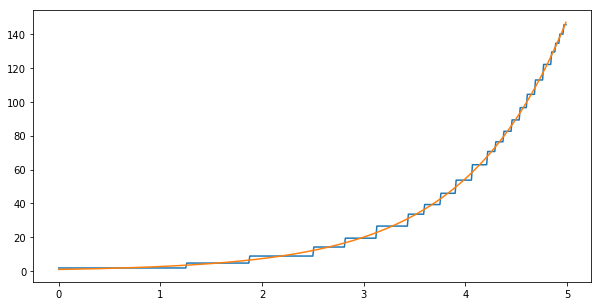

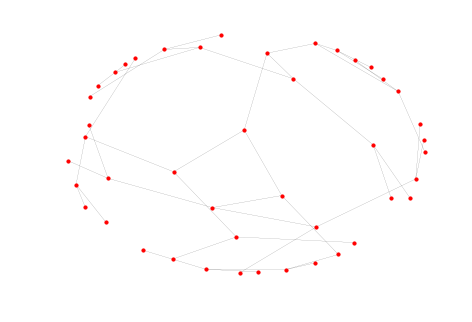

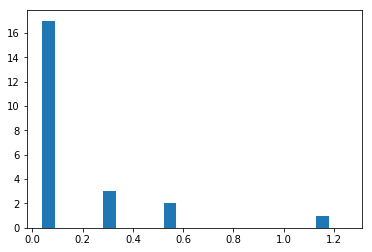

In [7]:
allInOne(save_mode=True)

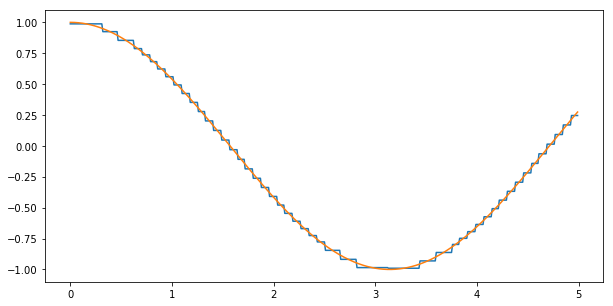

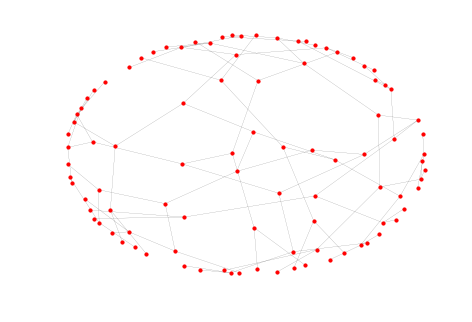

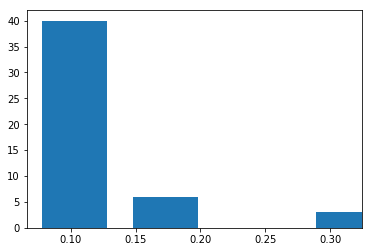

In [30]:
def deriveCos(x):
    return - np.sin(x)
allInOne(f=np.cos, derive= deriveCos, raffinement=.1, save_mode=True)

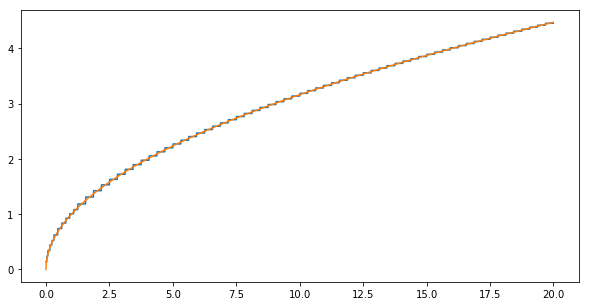

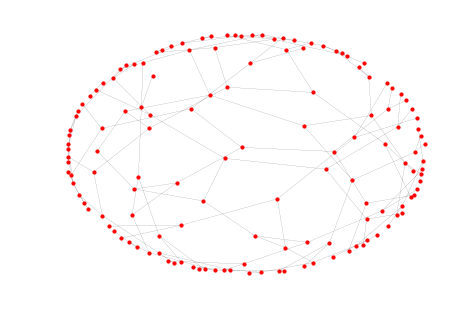

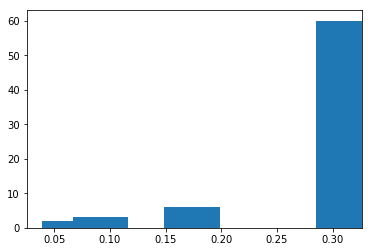

In [26]:
def deriveSQRT(x):
    return np.sqrt(x)/x

allInOne(interval=[0,20],f=np.sqrt, derive=deriveSQRT, raffinement=.3)

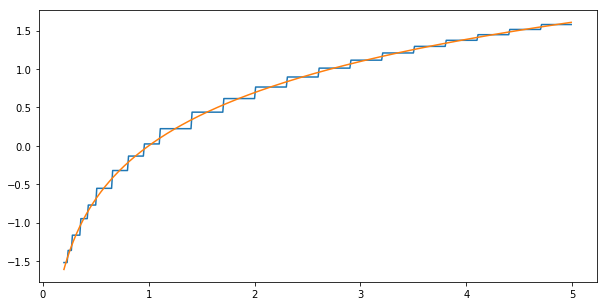

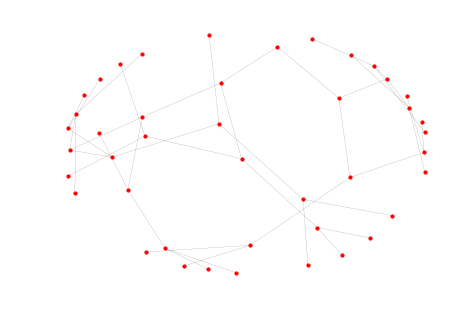

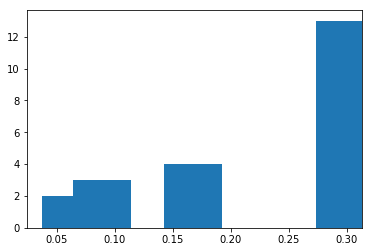

In [27]:
def deriveLOG(x):
    return 1/x
allInOne(interval=[.2,5],f=np.log, derive=deriveLOG, raffinement=.3)

In [38]:
import plotly.plotly as py
import plotly.graph_objs as go

import jgraph
from jgraph import *
import Graph
# I do not endorse importing * like this

#Set Up Tree with igraph

nr_vertices = 25
v_label = map(str, range(nr_vertices))
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None] 

labels = v_label

#Create Plotly Traces

lines = go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   )
dots = go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='',
                  marker=dict(symbol='dot',
                                size=18, 
                                color='#6175c1',    #'#DB4551', 
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  )

# Create Text Inside the Circle via Annotations

def make_annotations(pos, text, font_size=10, 
                     font_color='rgb(250,250,250)'):
    L=len(pos)
    if len(text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = go.Annotations()
    for k in range(L):
        annotations.append(
            go.Annotation(
                text=labels[k], # or replace labels with a different list 
                                # for the text within the circle  
                x=pos[k][0], y=2*M-position[k][1],
                xref='x1', yref='y1',
                font=dict(color=font_color, size=font_size),
                showarrow=False)
        )
    return annotations  

# Add Axis Specifications and Create the Layout

axis = dict(showline=False, # hide axis line, grid, ticklabels and  title
            zeroline=False,
            showgrid=False,
            showticklabels=False,
            )

layout = dict(title= 'Tree with Reingold-Tilford Layout',  
              annotations=make_annotations(position, v_label),
              font=dict(size=12),
              showlegend=False,
              xaxis=go.XAxis(axis),
              yaxis=go.YAxis(axis),          
              margin=dict(l=40, r=40, b=85, t=100),
              hovermode='closest',
              plot_bgcolor='rgb(248,248,248)'          
              )

# Plot

data=go.Data([lines, dots])
fig=dict(data=data, layout=layout)
fig['layout'].update(annotations=make_annotations(position, v_label))
py.iplot(fig, filename='Tree-Reingold-Tilf')
# use py.plot instead of py.iplot if you're not using a Jupyter notebook

ModuleNotFoundError: No module named 'Graph'